# Regression between sea level height and the timmerman wind data regions for cmip6 data

This regression can either be performed using observational or model (cmip6) data.
When observational or cmip6 data is used, functions containing respectively 'obs' or 'cmip6' should be used.


For each sea level datapoint, a wind stress data point located nearest to the sea level point to perform a regression.

In this notebook, functions are used from: 

'/code/import_data.py' 

'/code/regression.py' 

'/code/figures.py' 

In [33]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Github/Thesis-KNMI/Wind_contribution/Analysis/code')

import import_data as imprt
import regression as regres
import figures as figs

data_type = 'historical'
model = 'Timmerman'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Import and plot cmip6 sea level data (zos) historical

In [34]:
# Open data file
zos = imprt.import_cmip6_slh_data()

#### Import and plot nearby wind data

In [35]:
wind_data = imprt.import_cmip6_wind_data(model = model, data_type = data_type)

### Plot data

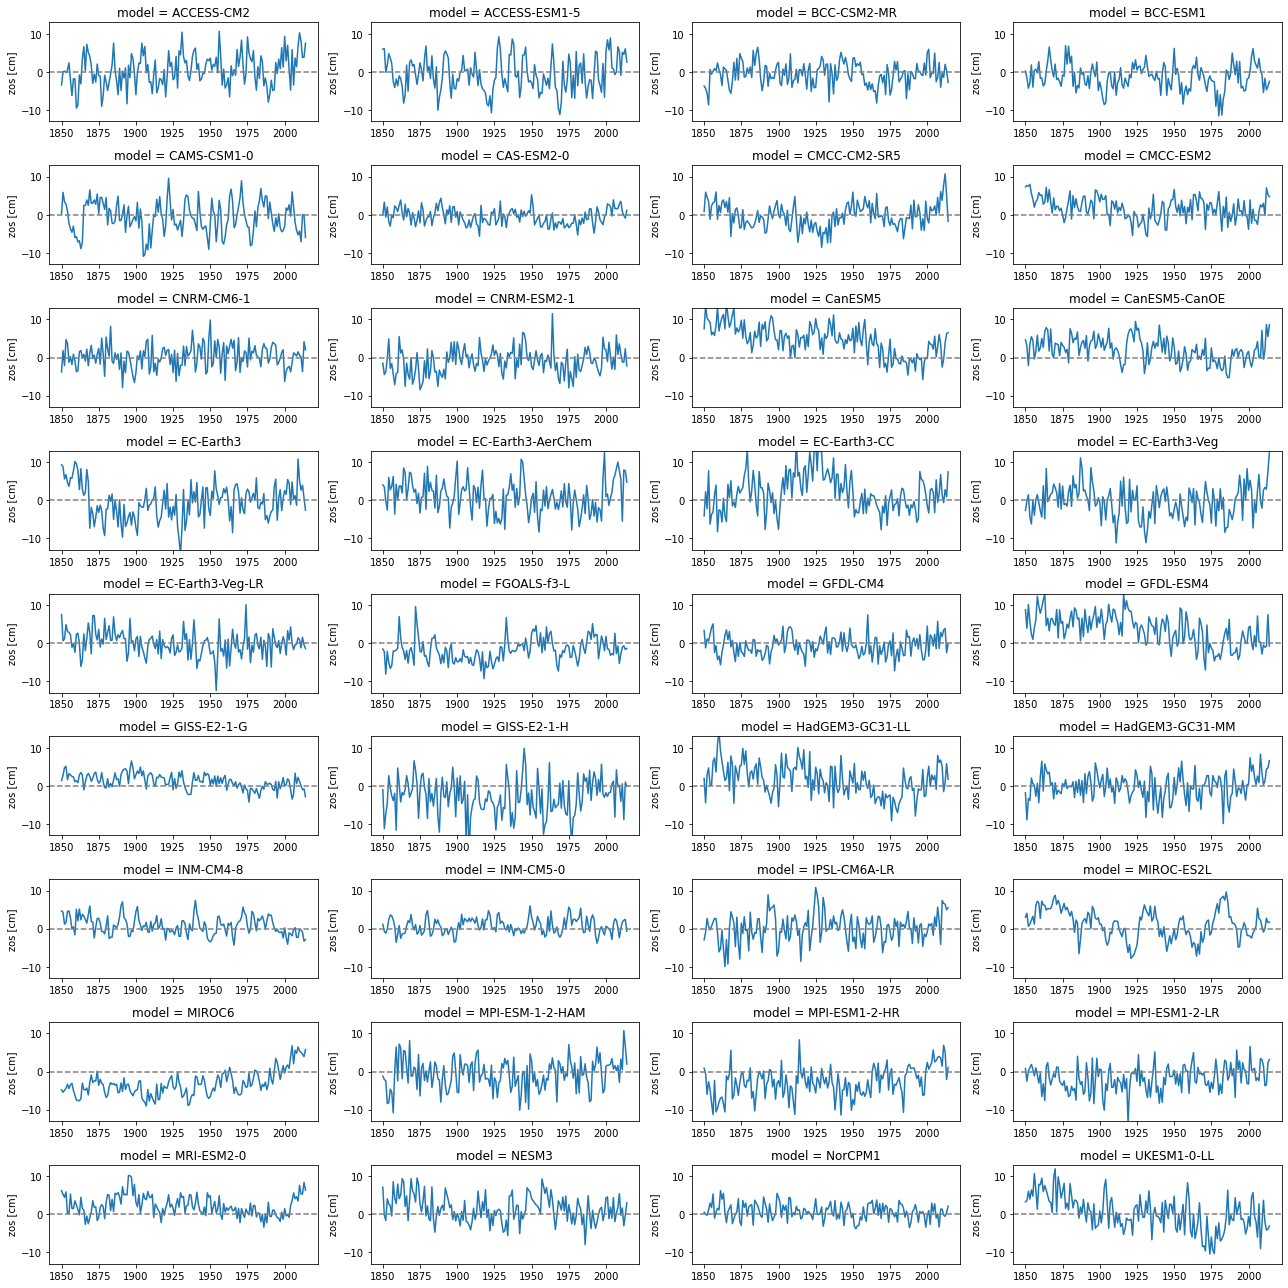

In [36]:
figs.plot_zos_data_per_model(zos, data_type)

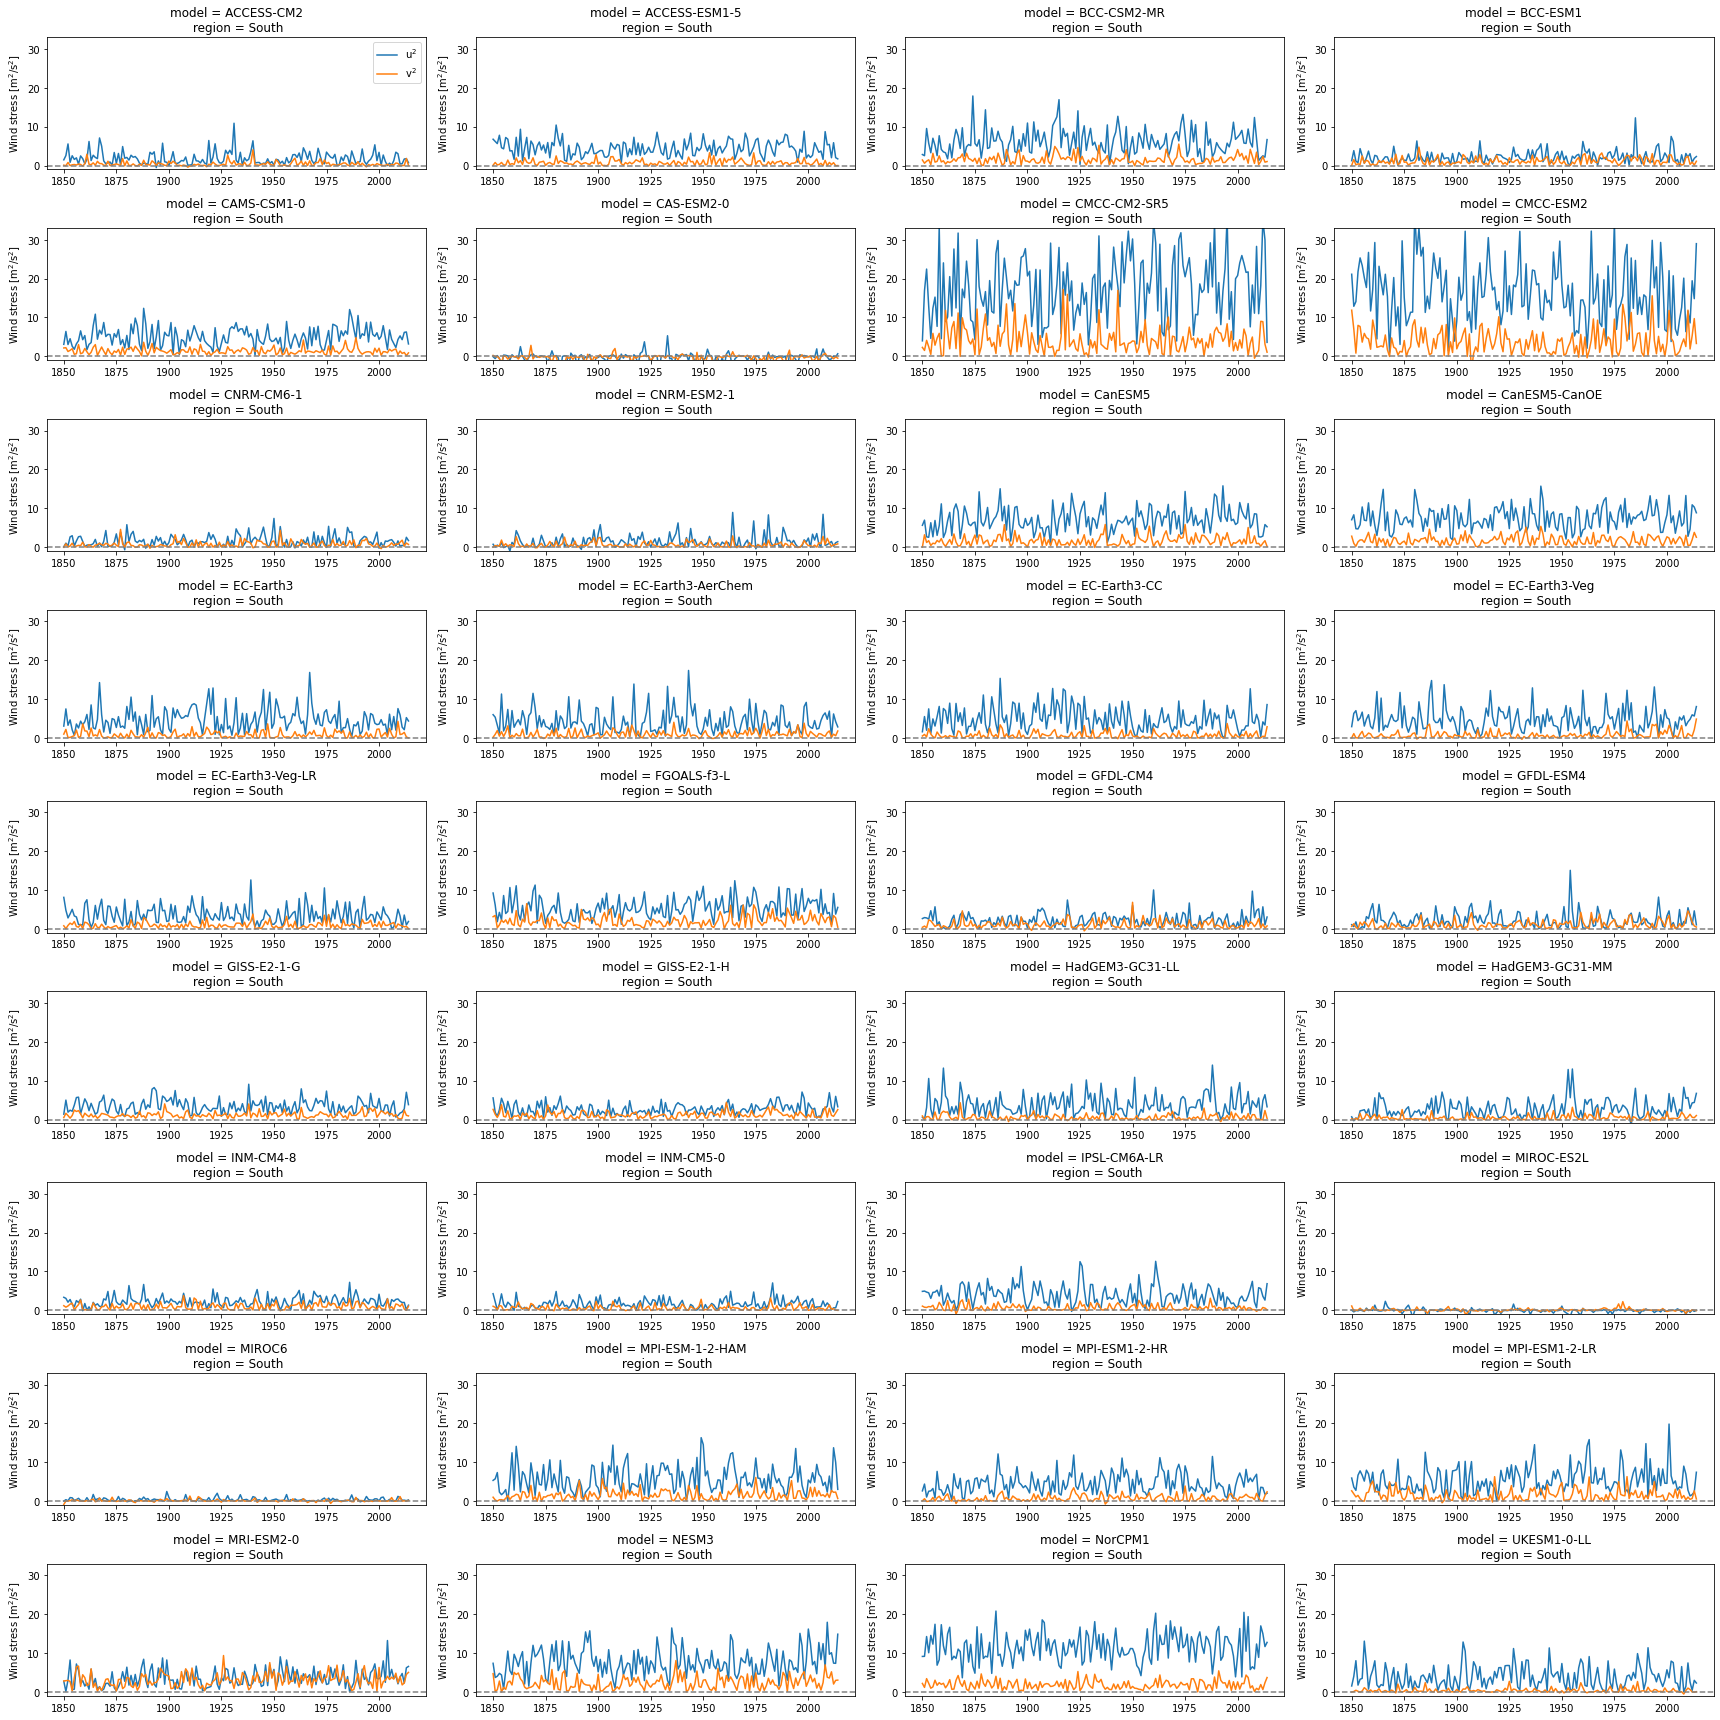

In [37]:
figs.plot_cmip6_wind_data_per_model(wind_data, model, data_type)

### Perform regression

In [38]:
results, timeseries, significance = regres.regression_cmip6(wind_data, zos, wind_model = model, data_type = data_type)

In [39]:
results.sel(station='Average').to_dataframe().drop('station', axis=1)

r2   r2_wind     r2_u2     r2_v2      rmse  constant  \
model                                                                           
ACCESS-CM2         0.479928  0.409330  0.355992  0.022993  2.889534  0.717534   
ACCESS-ESM1-5      0.472470  0.467090  0.455001  0.025769  3.171217 -1.065381   
BCC-CSM2-MR        0.304657  0.308111  0.149822  0.117651  2.584740 -0.665024   
BCC-ESM1           0.208153  0.186937  0.091389  0.058486  2.861281 -1.560208   
CAMS-CSM1-0        0.176278  0.179238  0.167550  0.000000  3.861497 -0.656288   
CAS-ESM2-0         0.393687  0.251474  0.246132  0.000000  1.612863 -0.931357   
CMCC-CM2-SR5       0.410473  0.380662  0.273451  0.059126  2.337076 -0.493676   
CMCC-ESM2          0.372152  0.328432  0.137144  0.171470  2.346952  1.715930   
CNRM-CM6-1         0.709957  0.713517  0.411330  0.345298  1.736789  0.277205   
CNRM-ESM2-1        0.691972  0.696569  0.527808  0.402614  1.932693 -1.123952   
CanESM5            0.695232  0.298731  0.221882  0.141494  1.971315  4.736667   
CanESM5-CanOE      0.609985  0.465520  0.309334  0.185955  1.920160  2.019012   
EC-Earth3          0.387616  0.366450  0.243730  0.205198  3.693892 -0.975538   
EC-Earth3-AerChem  0.727726  0.654973  0.529221  0.248867  2.088091  0.646208   
EC-Earth3-CC       0.552527  0.548919  0.457556  0.142230  3.507467  2.334166   
EC-Earth3-Veg      0.603622  0.591293  0.531515  0.225680  2.549703 -0.651629   
EC-Earth3-Veg-LR   0.706582  0.600904  0.500006  0.176534  1.834527 -0.519345   
FGOALS-f3-L        0.110558  0.103112  0.096052  0.000000  2.937523 -2.035240   
GFDL-CM4           0.529208  0.530540  0.509718  0.000000  1.772466 -0.607851   
GFDL-ESM4          0.710596  0.465357  0.356395  0.095297  2.127951  3.522845   
GISS-E2-1-G        0.479167  0.343025  0.160198  0.171710  1.320524  1.260870   
GISS-E2-1-H        0.132461  0.090229  0.069448  0.018778  4.520930 -3.478517   
HadGEM3-GC31-LL    0.675221  0.464042  0.323663  0.248817  2.461663  0.999136   
HadGEM3-GC31-MM    0.713558  0.648889  0.602995  0.120186  1.698408 -0.496081   
INM-CM4-8          0.105411  0.051090  0.017321  0.000000  2.251269  0.913529   
INM-CM5-0          0.127744  0.097281  0.097281  0.000000  1.840431  0.781748   
IPSL-CM6A-LR       0.717504  0.714203  0.467884  0.348598  2.017752 -0.109095   
MIROC-ES2L         0.404497  0.195348  0.156878  0.109839  2.987595  0.375690   
MIROC6             0.203891  0.168485  0.168485  0.000000  1.963630 -4.143368   
MPI-ESM-1-2-HAM    0.745394  0.738315  0.635255  0.264948  1.966704 -1.082265   
MPI-ESM1-2-HR      0.571389  0.574785  0.564981  0.000000  2.299232 -3.660971   
MPI-ESM1-2-LR      0.704371  0.709526  0.689587  0.058271  1.763575 -2.154974   
MRI-ESM2-0         0.484773  0.380979  0.297083  0.146488  1.809513  2.276026   
NESM3              0.555183  0.529628  0.345593  0.299920  2.348477  1.907720   
NorCPM1            0.708661  0.625482  0.580165  0.072664  1.148632  0.680033   
UKESM1-0-LL        0.768707  0.413627  0.327030  0.136802  2.258754 -0.394821   

                   channel_u2  channel_v2  south_u2  south_v2  midwest_u2  \
model                                                                       
ACCESS-CM2           0.000000    0.000000  0.000000 -0.000000    0.000000   
ACCESS-ESM1-5       -0.945055   -0.131561 -0.000000 -0.000000   -0.000000   
BCC-CSM2-MR         -0.000000   -0.000000  0.000000 -0.000000    0.000000   
BCC-ESM1            -0.000000   -0.000000  0.000000 -0.710726    0.000000   
CAMS-CSM1-0         -0.000000    0.203606  0.000000  0.000000    0.000000   
CAS-ESM2-0          -0.000000   -0.000000 -0.000000  0.000000   -0.000000   
CMCC-CM2-SR5         0.000000    0.095550  0.000000  0.000000    0.965539   
CMCC-ESM2            0.000000    0.893929  0.000000  0.006301    0.000000   
CNRM-CM6-1           0.177693    1.753947  0.614683 -0.000000    0.000000   
CNRM-ESM2-1          0.000000    1.437279  1.633540 -0.000000    0.000000   
CanESM5              0

In [40]:
timeseries

<xarray.Dataset>
Dimensions:       (model: 36, station: 7, time: 165)
Coordinates:
  * time          (time) int64 1850 1851 1852 1853 1854 ... 2011 2012 2013 2014
  * station       (station) <U15 'Vlissingen' 'Hoek v. Holland' ... 'Average'
  * model         (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
Data variables: (12/23)
    channel_u2    (model, station, time) float64 0.0 0.0 ... -0.09075 -0.186
    channel_v2    (model, station, time) float64 -0.0 -0.0 ... -0.6593 -0.4289
    south_u2      (model, station, time) float64 0.0 -0.0 ... -0.2441 -0.4419
    south_v2      (model, station, time) float64 -0.0 -0.0 0.0 ... 0.0 0.0 0.0
    midwest_u2    (model, station, time) float64 -0.0 0.0 0.0 ... -0.0 -0.0 -0.0
    midwest_v2    (model, station, time) float64 -0.0 -0.0 0.0 ... -0.0 -0.0
    ...            ...
    midwest       (model, station, time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    mideast       (model, station, time) float64 0.3752 0.7775 ... 0.2843 0.2569
    northwest     (model, station, time) float64 0.05664 2.363 ... -1.093 -0.43
    northeast     (model, station, time) float64 0.0375 0.1731 ... 0.0 0.0
    u2_total      (model, station, time) float64 0.09414 2.536 ... -0.6694
    v2_total      (model, station, time) float64 0.3752 0.7775 ... -0.5606

In [41]:
significance.sel(station='Average').to_dataframe().drop('station', axis=1)

Channel u$^2$  Channel v$^2$  South u$^2$  South v$^2$  \
model                                                                       
ACCESS-CM2                  True          False         True        False   
ACCESS-ESM1-5              False          False         True        False   
BCC-CSM2-MR                False           True         True         True   
BCC-ESM1                   False           True        False         True   
CAMS-CSM1-0                 True          False         True        False   
CAS-ESM2-0                 False          False         True        False   
CMCC-CM2-SR5                True           True         True         True   
CMCC-ESM2                   True           True         True         True   
CNRM-CM6-1                  True           True         True         True   
CNRM-ESM2-1                 True           True         True         True   
CanESM5                     True           True         True         True   
CanESM5-CanOE               True           True         True         True   
EC-Earth3                   True           True         True         True   
EC-Earth3-AerChem           True           True         True         True   
EC-Earth3-CC                True           True         True         True   
EC-Earth3-Veg               True           True         True         True   
EC-Earth3-Veg-LR            True           True         True         True   
FGOALS-f3-L                False           True         True        False   
GFDL-CM4                    True          False         True        False   
GFDL-ESM4                   True          False         True        False   
GISS-E2-1-G                 True           True         True        False   
GISS-E2-1-H                False          False         True        False   
HadGEM3-GC31-LL             True           True         True         True   
HadGEM3-GC31-MM             True           True         True         True   
INM-CM4-8                  False          False         True        False   
INM-CM5-0                  False          False         True        False   
IPSL-CM6A-LR                True           True         True         True   
MIROC-ES2L                  True           True         True         True   
MIROC6                     False          False         True        False   
MPI-ESM-1-2-HAM             True           True         True         True   
MPI-ESM1-2-HR               True           True         True        False   
MPI-ESM1-2-LR               True           True         True         True   
MRI-ESM2-0                  True           True         True         True   
NESM3                       True           True         True         True   
NorCPM1                     True           True         True         True   
UKESM1-0-LL                 True           True         True         True   

                   Mid-West u$^2$  Mid-West v$^2$  Mid-East u$^2$  \
model                                                               
ACCESS-CM2                   True           False            True   
ACCESS-ESM1-5                True           False            True   
BCC-CSM2-MR                  True            True            True   
BCC-ESM1                     True            True            True   
CAMS-CSM1-0                  True           False            True   
CAS-ESM2-0                   True           False            True   
CMCC-CM2-SR5                 True            True            True   
CMCC-ESM2                    True            True            True   
CNRM-CM6-1                   True            True            True   
CNRM-ESM2-1                  True            True            True   
CanESM5                      True            True            True   
CanESM5-CanOE                True            True            True   
EC-Earth3                    True            True            True   
EC-Earth3-AerChem            True            True        

#### Plot regression results

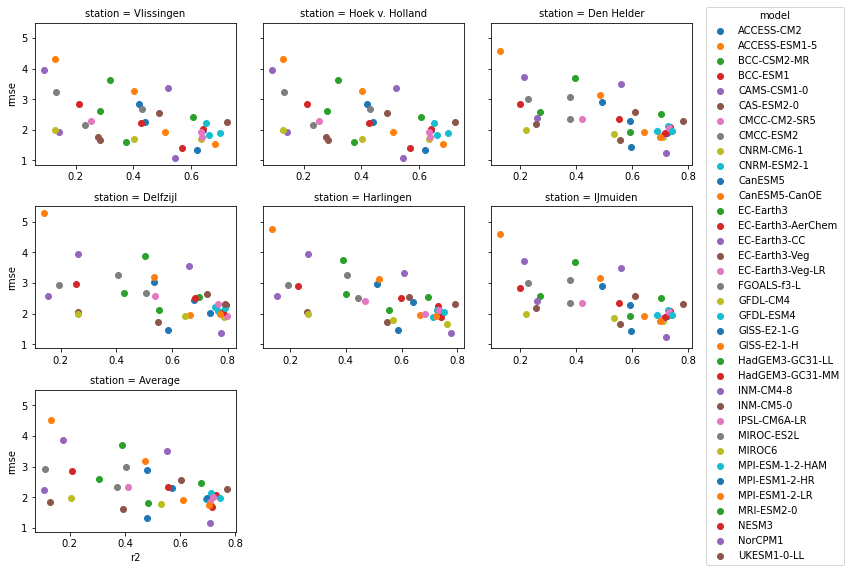

In [42]:
figs.plot_cmip6_two_variables(results, 'r2', 'rmse', data_type)

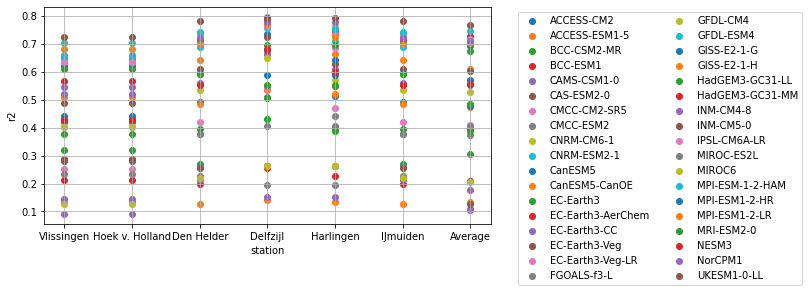

In [43]:
figs.plot_cmip6_result_per_station(results, 'r2', data_type)

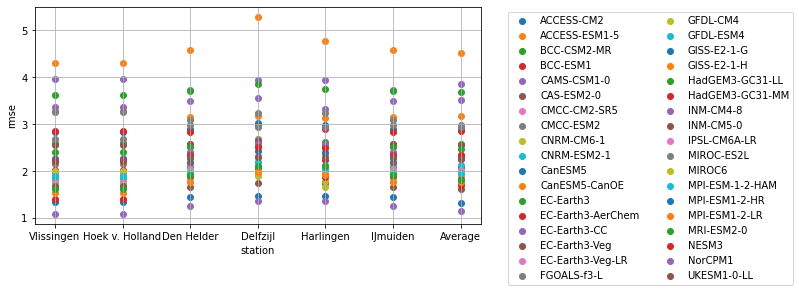

In [44]:
figs.plot_cmip6_result_per_station(results, 'rmse', data_type)

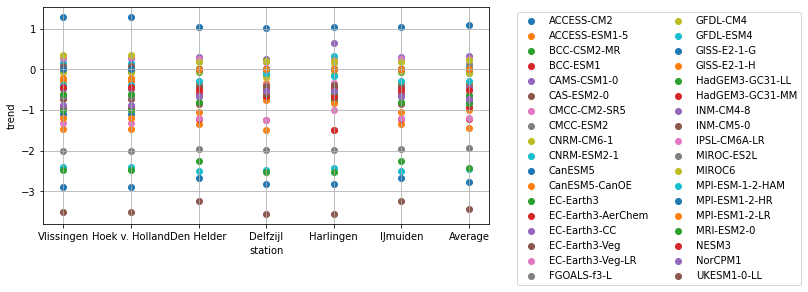

In [45]:
figs.plot_cmip6_result_per_station(results, 'trend', data_type)

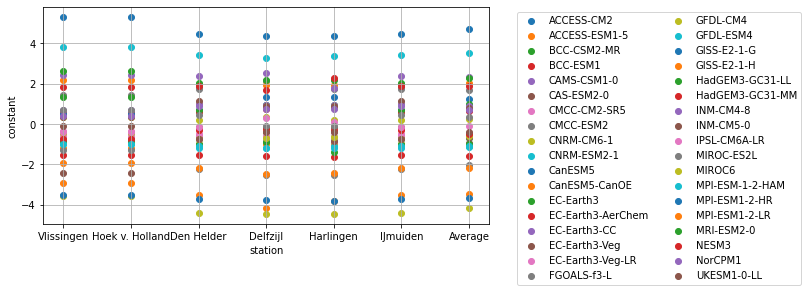

In [46]:
figs.plot_cmip6_result_per_station(results, 'constant', data_type)

In [47]:
timeseries

<xarray.Dataset>
Dimensions:       (model: 36, station: 7, time: 165)
Coordinates:
  * time          (time) int64 1850 1851 1852 1853 1854 ... 2011 2012 2013 2014
  * station       (station) <U15 'Vlissingen' 'Hoek v. Holland' ... 'Average'
  * model         (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
Data variables: (12/23)
    channel_u2    (model, station, time) float64 0.0 0.0 ... -0.09075 -0.186
    channel_v2    (model, station, time) float64 -0.0 -0.0 ... -0.6593 -0.4289
    south_u2      (model, station, time) float64 0.0 -0.0 ... -0.2441 -0.4419
    south_v2      (model, station, time) float64 -0.0 -0.0 0.0 ... 0.0 0.0 0.0
    midwest_u2    (model, station, time) float64 -0.0 0.0 0.0 ... -0.0 -0.0 -0.0
    midwest_v2    (model, station, time) float64 -0.0 -0.0 0.0 ... -0.0 -0.0
    ...            ...
    midwest       (model, station, time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    mideast       (model, station, time) float64 0.3752 0.7775 ... 0.2843 0.2569
    northwest     (model, station, time) float64 0.05664 2.363 ... -1.093 -0.43
    northeast     (model, station, time) float64 0.0375 0.1731 ... 0.0 0.0
    u2_total      (model, station, time) float64 0.09414 2.536 ... -0.6694
    v2_total      (model, station, time) float64 0.3752 0.7775 ... -0.5606

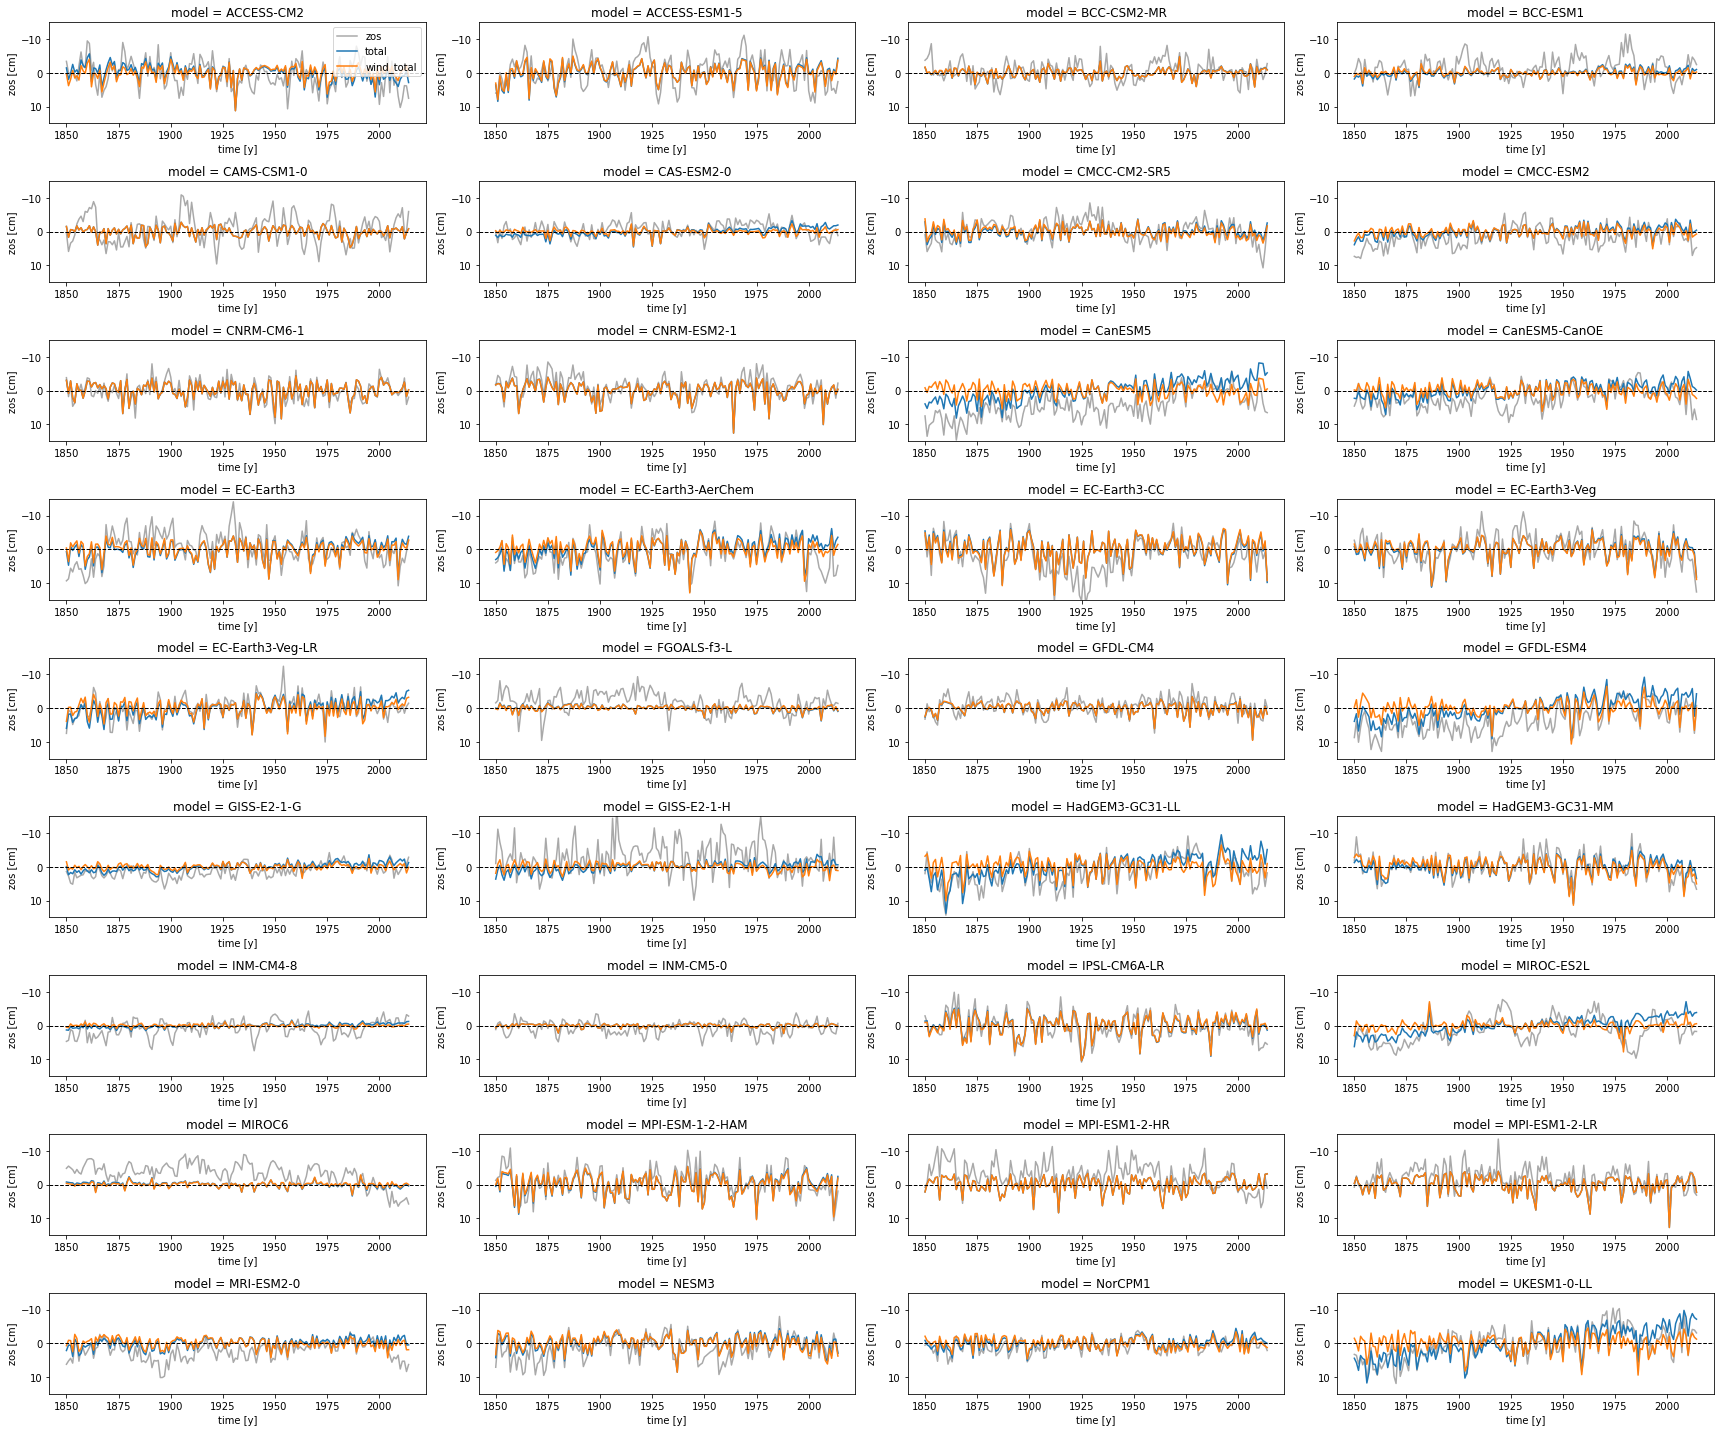

In [48]:
labels = ['total', 'wind_total']

figs.plot_zos_regression_result_per_model_one_station(zos, timeseries, labels, model)

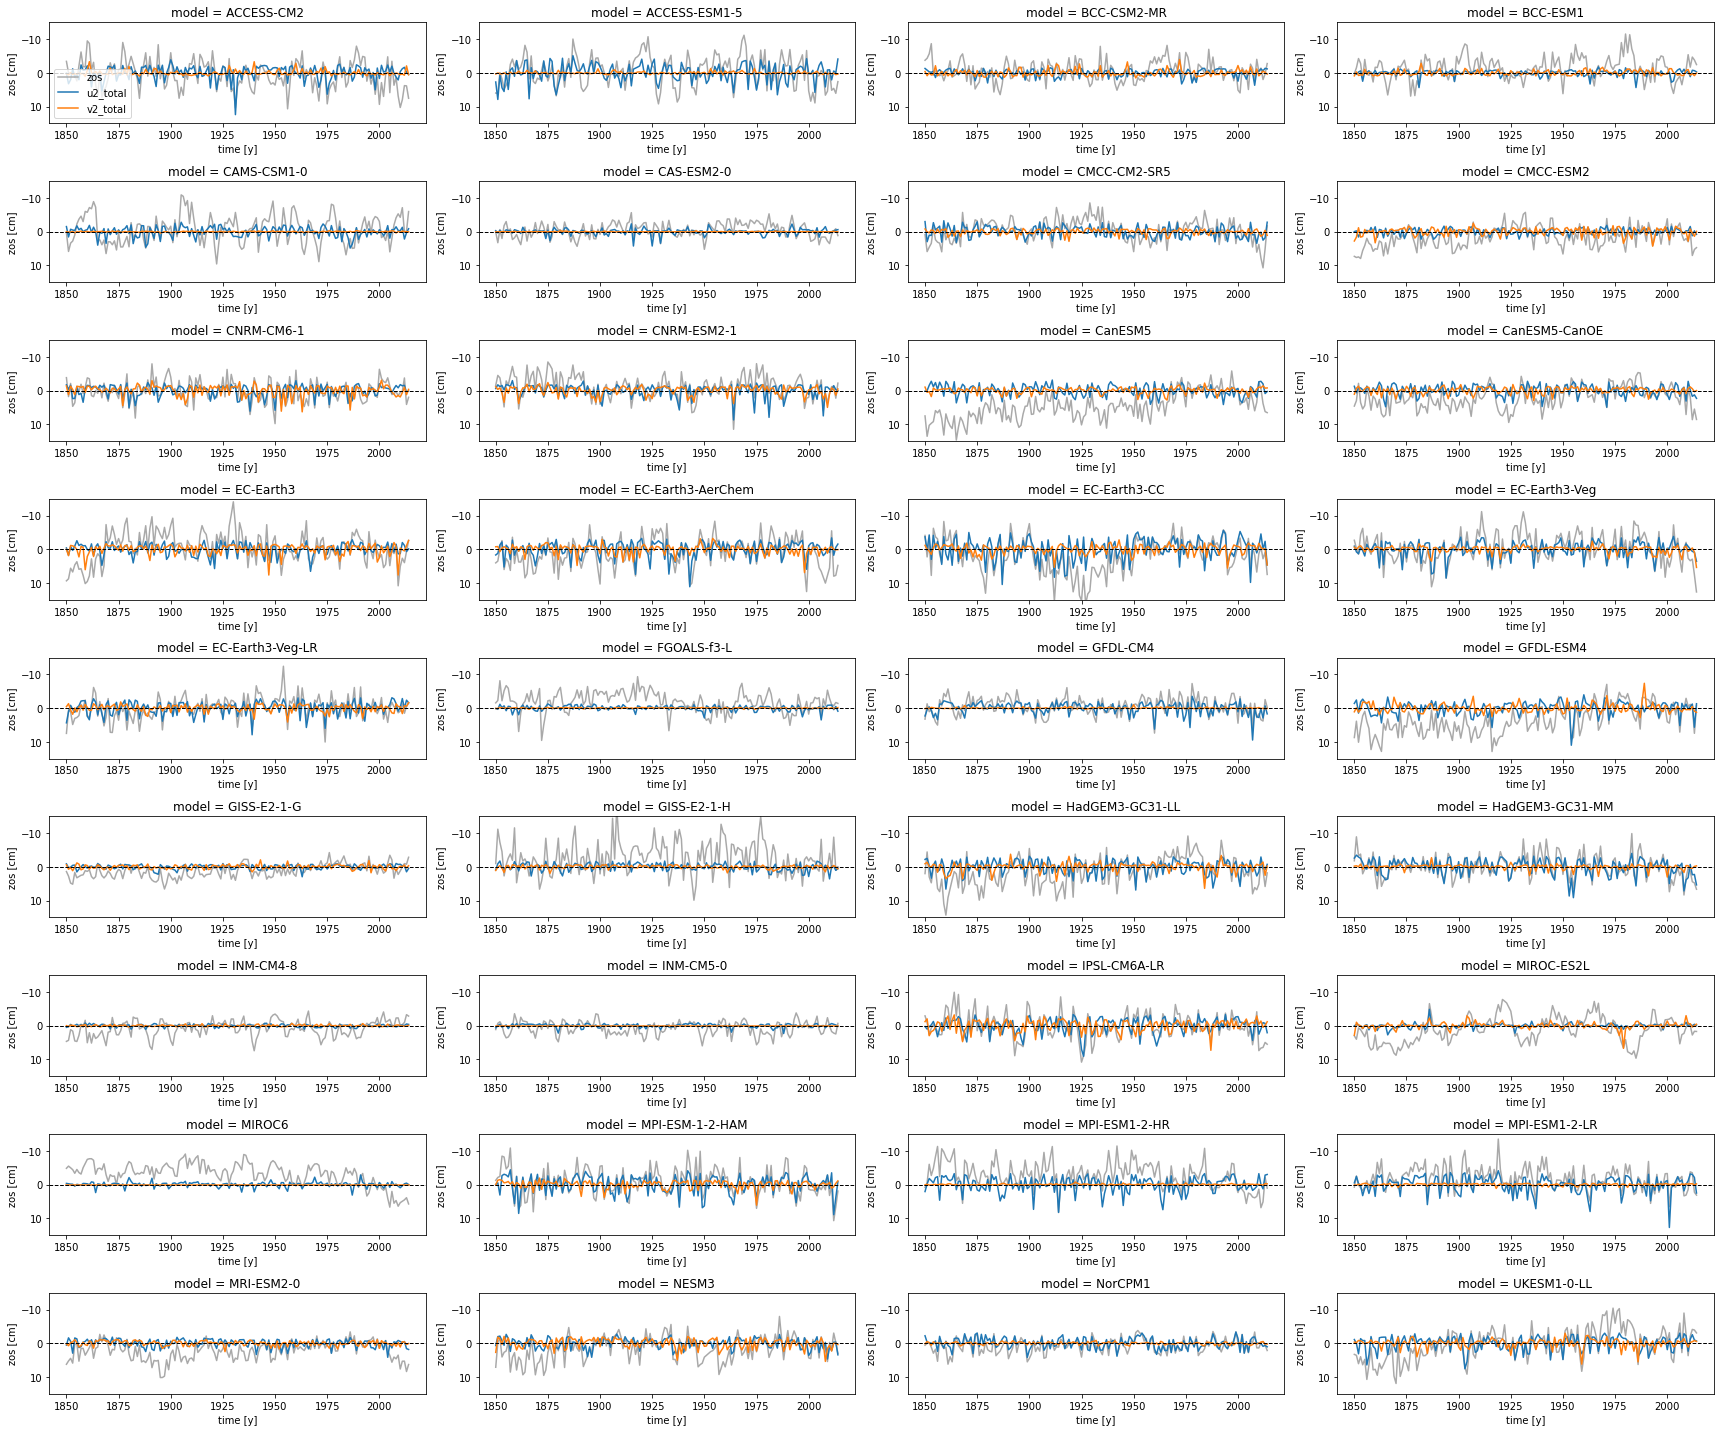

In [49]:
labels = ['u2_total', 'v2_total']

figs.plot_zos_regression_result_per_model_one_station(zos, timeseries, labels, model)

#### Plot trends

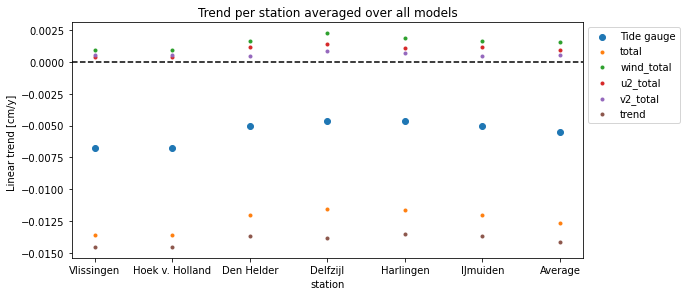

In [50]:
figs.plot_cmip6_trends_timeseries_per_station_model_averages(zos, timeseries, ['total', 'wind_total', 'u2_total', 'v2_total', 'trend'], model, data_type, errorbar = False)